# Modeling Your Data - Lab

## Introduction 

In this lab you'll perform a full linear regression analysis on the data. You'll implement the process demonstrated in the previous lesson, taking a stepwise approach to analyze and improve the model along the way.

## Objectives
You will be able to:

* Perform a full linear regression with iterations based on p-value of features and other parameters
* Create visualizations to better understand the distributions of variables in a dataset
* Determine whether or not the assumptions for linear regression hold true for this example

## Build an Initial Regression Model

To start, perform a train-test split and create an initial regression model to model the `list_price` using all of your available features.

> **Note:** In order to write the model you'll have to do some tedious manipulation of your column names. Statsmodels will not allow you to have spaces, apostrophe or arithmetic symbols (+) in your column names. Preview them and refine them as you go.  
**If you receive an error such as "PatsyError: error tokenizing input (maybe an unclosed string?)", then you need to further preprocess your column names.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [2]:
# Import the dataset 'Lego_dataset_cleaned.csv'
df = pd.read_csv('Lego_dataset_cleaned.csv')
df.head()

,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10+,ages_10-14,ages_10-16,ages_10-21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very Challenging,review_difficulty_Very Easy,review_difficulty_unknown
0,-0.273020,29.99,-0.398512,-0.655279,-0.045687,-0.365010,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,-0.404154,19.99,-0.398512,-0.655279,0.990651,-0.365010,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,-0.517242,12.99,-0.147162,-0.132473,-0.460222,-0.204063,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0.635296,99.99,0.187972,-1.352353,0.161581,0.117830,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0.288812,79.99,-0.063378,-2.049427,0.161581,-0.204063,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [4]:
# Your code here - Manipulate column names
df.columns

Index(['piece_count', 'list_price', 'num_reviews', 'play_star_rating',
       'star_rating', 'val_star_rating', 'ages_10+', 'ages_10-14',
       'ages_10-16', 'ages_10-21',
       ...
       'country_NZ', 'country_PL', 'country_PT', 'country_US',
       'review_difficulty_Average', 'review_difficulty_Challenging',
       'review_difficulty_Easy', 'review_difficulty_Very Challenging',
       'review_difficulty_Very Easy', 'review_difficulty_unknown'],
      dtype='object', length=103)

In [5]:
subs = [(' ', '_'),('.',''),("'",""),('™', ''), ('®',''), ('+','plus'), ('½','half'), ('-','_')]

def col_formatting(col):  
    for old, new in subs:
        col = col.replace(old, new)
    return col

In [6]:
df.columns = [col_formatting(col) for col in df.columns]

In [9]:
# Your code here - Define the target and predictors
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10870 entries, 0 to 10869
Columns: 103 entries, piece_count to review_difficulty_unknown
dtypes: float64(6), int64(97)
memory usage: 8.5 MB


In [11]:
outcome = 'list_price'
x_cols = list(df.columns)
x_cols.remove(outcome)

In [12]:
# Your code here - Split into train and test
train, test = train_test_split(df)

In [16]:
test.info()

# Note how this is just a new dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2718 entries, 5863 to 4026
Columns: 103 entries, piece_count to review_difficulty_unknown
dtypes: float64(6), int64(97)
memory usage: 2.2 MB


In [26]:
print("Train is {x}% of the dataframe.".format(x=round(len(train)/len(df), 2)*100))
print("Test is {x}% of the dataframe.".format(x=round(len(test)/len(df), 2)*100))
train.head()

Train is 75.0% of the dataframe.
Test is 25.0% of the dataframe.


,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10plus,ages_10_14,ages_10_16,ages_10_21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very_Challenging,review_difficulty_Very_Easy,review_difficulty_unknown
3687,-0.431824,28.7520,-0.398512,1.087407,0.990651,-1.169744,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
10818,-0.493181,24.3878,-0.426440,-0.655279,-1.082024,-0.365010,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2307,-0.252567,35.0922,-0.063378,-0.306741,-0.667489,-0.204063,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6432,-0.171962,41.9860,-0.258873,-0.306741,0.161581,-0.043117,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
431,-0.125042,49.9900,-0.286801,0.738870,-0.460222,0.439724,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [30]:
# Your code here - Fit the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     543.3
Date:                Thu, 08 Oct 2020   Prob (F-statistic):               0.00
Time:                        13:42:54   Log-Likelihood:                -40450.
No. Observations:                8152   AIC:                         8.109e+04
Df Residuals:                    8057   BIC:                         8.176e+04
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           64.9092      1.762     36.847      0.000      61.456      68.362
piece_count                                         75.3673      0.907     83.134      0.000      73.590      77.144
num_reviews                                          6.4161      0.671      9.561      0.000       5.101       7.732
play_star_rating                                     5.2120      0.622      8.376      0.000       3.992       6.432
star_rating                                         -1.5383      0.708     -2.173      0.030      -2.926      -0.151
val_star_rating                                     -8.4075      0.633    -13.273      0.000      -9.649      -7.166
ages_10plus                                        125.8669      6.407     19.644      0.000     113.307     138.427
ages_10_14                                         -24.4518      8.383     -2.917      0.004     -40.885      -8.018
ages_10_16                                         -12.7484      4.029     -3.165      0.002     -20.645      -4.851
ages_10_21                                          56.4663      7.033      8.029      0.000      42.680      70.253
ages_11_16                                         -26.1799      5.818     -4.500      0.000     -37.584     -14.775
ages_12plus                                         72.7550      5.545     13.121      0.000      61.886      83.624
ages_12_16                                         -54.1377      6.896     -7.850      0.000     -67.656     -40.619
ages_14plus                                         23.4431      4.118      5.693      0.000      15.371      31.515
ages_16plus                                         35.3389      6.155      5.742      0.000      23.274      47.404
ages_1half_3                                        -9.1144      2.411     -3.780      0.000     -13.841      -4.387
ages_1half_5                                        -3.9097      2.994     -1.306      0.192      -9.778       1.958
ages_2_5                                            15.1342      1.666      9.086      0.000      11.869      18.399
ages_4plus                                         -17.8227      6.421     -2.776      0.006     -30.410      -5.236
ages_4_7                                            -5.9371      3.154     -1.882      0.060     -12.121       0.246
ages_4_99                                           -3.1818      3.638     -0.875      0.382     -10.312       3.949
ages_5plus                                          -9.1495      3.104     -2.948      0.003     -15.234      -3.065
ages_5_12                                          -35.3997      3.107    -11.393      0.000     -41.491     -29.309
ages_5_8                                 

## Remove the Uninfluential Features

Based on the initial model, remove those features which do not appear to be statistically relevant and rerun the model.

In [53]:
summ = model.summary()
p_table = summ.tables[1] # there are tables[0:2]. This calls the one with all the column names
p_table = pd.DataFrame(p_table.data) # making a dataframe of it
p_table
# p_table.columns = p_table.iloc[0] # the 0 row has all the model.summary() attributes

,0,1,2,3,4,5,6
0,,coef,std err,t,P>|t|,[0.025,0.975]
1,Intercept,64.9092,1.762,36.847,0.000,61.456,68.362
2,piece_count,75.3673,0.907,83.134,0.000,73.590,77.144
3,num_reviews,6.4161,0.671,9.561,0.000,5.101,7.732
4,play_star_rating,5.2120,0.622,8.376,0.000,3.992,6.432
...,...,...,...,...,...,...,...
99,review_difficulty_Challenging,18.4931,2.183,8.470,0.000,14.213,22.773
100,review_difficulty_Easy,1.9069,1.732,1.101,0.271,-1.488,5.301
101,review_difficulty_Very_Challenging,27.0410,8.682,3.115,0.002,10.022,44.060
102,review_difficulty_Very_Easy,0.4861,2.091,0.232,0.816,-3.613,4.585


In [93]:
# Your code here - Remove features which do not appear to be statistically relevant
summ = model.summary()
p_table = summ.tables[1] # there are tables[0:2]. This calls the one with all the column names
p_table = pd.DataFrame(p_table.data) # making a dataframe of it
p_table.columns = p_table.iloc[0]    # the 0 row has all the model.summary() attributes. By assigning that with
                                        # p.table.columns, you're now making that 0 row the column headers
p_table = p_table.drop(0)            # the model.summary attributes are also still row 0. Dropping it.

# the index is still 0..103. reseting them
p_table = p_table.set_index(p_table.columns[0])


# p_table['P>|t|'] is a string. Make it a float
p_table['P>|t|'] = p_table['P>|t|'].astype(float)


# looking for them less than alpha. Without the .index, it just makes a list of the column names. this gives you the row names
x_cols = list(p_table[p_table['P>|t|'] <= 0.05].index)

# we don't need the Intercept for our data cleaning
x_cols.remove('Intercept')
p_table = p_table.drop(index="Intercept")
print('The table has ' + str(len(p_table)) + ' rows and the number of p values less than alpha are ' + str(len(x_cols)))
p_table.head()

The table has 102 rows and the number of p values less than alpha are 71


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
piece_count,75.3673,0.907,83.134,0.00,73.590,77.144
num_reviews,6.4161,0.671,9.561,0.00,5.101,7.732
play_star_rating,5.2120,0.622,8.376,0.00,3.992,6.432
star_rating,-1.5383,0.708,-2.173,0.03,-2.926,-0.151
val_star_rating,-8.4075,0.633,-13.273,0.00,-9.649,-7.166


In [94]:
# Your code here - Refit the model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     729.8
Date:                Thu, 08 Oct 2020   Prob (F-statistic):               0.00
Time:                        14:29:34   Log-Likelihood:                -40460.
No. Observations:                8152   AIC:                         8.106e+04
Df Residuals:                    8081   BIC:                         8.156e+04
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           63.7613      1.503     42.422      0.000      60.815      66.708
piece_count                                         75.4936      0.892     84.662      0.000      73.746      77.242
num_reviews                                          6.5308      0.664      9.835      0.000       5.229       7.833
play_star_rating                                     5.3639      0.608      8.816      0.000       4.171       6.557
star_rating                                         -1.4397      0.688     -2.092      0.036      -2.789      -0.091
val_star_rating                                     -8.4443      0.600    -14.073      0.000      -9.621      -7.268
ages_10plus                                        133.3871      7.253     18.391      0.000     119.170     147.605
ages_10_14                                         -18.5053      8.710     -2.125      0.034     -35.579      -1.432
ages_10_16                                          -7.7971      3.880     -2.009      0.045     -15.404      -0.191
ages_10_21                                          64.2138      7.703      8.336      0.000      49.113      79.315
ages_11_16                                         -21.8721      5.671     -3.857      0.000     -32.989     -10.755
ages_12plus                                         78.9292      6.533     12.082      0.000      66.123      91.735
ages_12_16                                         -48.9170      7.289     -6.711      0.000     -63.205     -34.629
ages_14plus                                         28.9562      4.811      6.019      0.000      19.526      38.386
ages_16plus                                         40.0981      6.949      5.771      0.000      26.477      53.719
ages_1half_3                                        -2.2748      3.105     -0.733      0.464      -8.362       3.813
ages_2_5                                            21.6865      1.947     11.138      0.000      17.870      25.503
ages_4plus                                         -16.0680      9.815     -1.637      0.102     -35.309       3.173
ages_5plus                                          -7.4359      3.058     -2.432      0.015     -13.430      -1.442
ages_5_12                                          -28.5989      2.659    -10.754      0.000     -33.812     -23.386
ages_6plus                                         -19.2442      5.821     -3.306      0.001     -30.654      -7.834
ages_6_12                                          -15.4613      1.851     -8.355      0.000     -19.089     -11.834
ages_7_12                                          -15.0155      2.176     -6.901      0.000     -19.281     -10.750
ages_7_14                                

> **Comment:** You should see that the model performance is identical. Additionally, observe that there are further features which have been identified as unimpactful. Continue to refine the model accordingly.

In [ ]:
# Your code here - Refit the model

## Investigate Multicollinearity

There are still a lot of features in the current model! Chances are there are some strong multicollinearity issues. Begin to investigate the extent of this problem.

In [96]:
# Your code here
X = df[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

C:\Users\halpe\.conda\envs\learn-env\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


[('piece_count', 4.585456757284939),
 ('num_reviews', 2.619199996267367),
 ('play_star_rating', 2.4474690580460394),
 ('star_rating', 3.1831126630091355),
 ('val_star_rating', 2.412751246535343),
 ('ages_10plus', 17.788808031208898),
 ('ages_10_14', 1.0983330857414706),
 ('ages_10_16', 1.1743814436631053),
 ('ages_10_21', 7.162478029443118),
 ('ages_11_16', 1.163821648650724),
 ('ages_12plus', 7.251854746765543),
 ('ages_12_16', 1.1730310103323909),
 ('ages_14plus', 2.212174324039579),
 ('ages_16plus', 9.586616054162418),
 ('ages_2_5', 1.2109611419502229),
 ('ages_5plus', inf),
 ('ages_5_12', 3.219142784463443),
 ('ages_6plus', 2.6674602745278837),
 ('ages_6_12', 1.9144919976700085),
 ('ages_7_12', 1.497647893172521),
 ('ages_7_14', 1.7794469357534382),
 ('ages_8plus', 3.33285578185265),
 ('ages_8_12', 1.2857215725875522),
 ('ages_8_14', 1.8913875322266929),
 ('ages_9plus', 1.555321467976598),
 ('ages_9_12', 1.0211417026436556),
 ('ages_9_14', 1.889472399696589),
 ('theme_name_Architec

## Perform Another Round of Feature Selection

Once again, subset your features based on your findings above. Then rerun the model once again.

In [97]:
# Your code here - Subset features based on multicollinearity
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

67 58


In [98]:
# Your code here - Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     768.1
Date:                Thu, 08 Oct 2020   Prob (F-statistic):               0.00
Time:                        14:34:49   Log-Likelihood:                -40942.
No. Observations:                8152   AIC:                         8.200e+04
Df Residuals:                    8093   BIC:                         8.242e+04
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           71.0424      1.125     63.170      0.000      68.838      73.247
piece_count                                         77.3380      0.697    110.952      0.000      75.972      78.704
num_reviews                                          4.5586      0.618      7.372      0.000       3.346       5.771
play_star_rating                                     7.6952      0.552     13.942      0.000       6.613       8.777
star_rating                                         -2.6184      0.700     -3.739      0.000      -3.991      -1.246
val_star_rating                                    -10.0521      0.625    -16.081      0.000     -11.277      -8.827
ages_10_14                                         -39.2209      9.097     -4.311      0.000     -57.053     -21.388
ages_10_16                                         -18.4144      3.768     -4.887      0.000     -25.800     -11.028
ages_11_16                                         -36.8785      5.561     -6.631      0.000     -47.780     -25.977
ages_12_16                                         -62.0722      7.142     -8.691      0.000     -76.072     -48.072
ages_14plus                                          4.9869      3.991      1.250      0.212      -2.837      12.810
ages_2_5                                            14.9873      1.802      8.317      0.000      11.455      18.520
ages_5_12                                          -35.8913      2.647    -13.560      0.000     -41.080     -30.703
ages_6plus                                         -26.9238      6.082     -4.427      0.000     -38.846     -15.002
ages_6_12                                          -24.7167      1.654    -14.947      0.000     -27.958     -21.475
ages_7_12                                          -23.7457      2.062    -11.518      0.000     -27.787     -19.704
ages_7_14                                          -18.9590      1.733    -10.939      0.000     -22.356     -15.561
ages_8plus                                          -2.2808      4.391     -0.519      0.603     -10.887       6.326
ages_8_12                                          -23.0010      2.620     -8.781      0.000     -28.136     -17.866
ages_8_14                                          -19.8273      1.857    -10.676      0.000     -23.468     -16.187
ages_9plus                                          15.1069     10.539      1.433      0.152      -5.552      35.766
ages_9_12                                          -33.8344      6.352     -5.327      0.000     -46.286     -21.383
ages_9_14                                          -18.7852      2.606     -7.208      0.000     -23.894     -13.676
theme_name_BOOST                         

## Check the Normality Assumption

Check whether the normality assumption holds for your model.

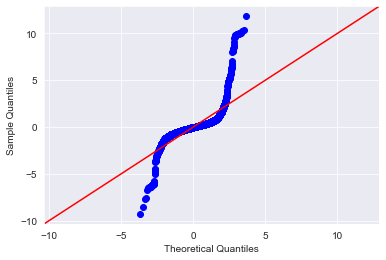

In [99]:
# Your code here - Check that the residuals are normally distributed
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

## Check Homoscedasticity Assumption

Check whether the model's errors are indeed homoscedastic or if they violate this principle and display heteroscedasticity.

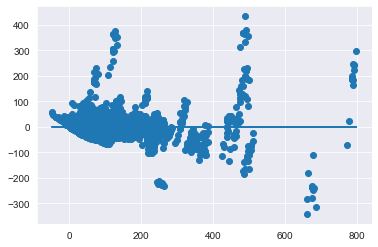

In [100]:
# Your code here - Check that the residuals are homoscedastic
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

> **Comment:** This displays a fairly pronounced 'funnel' shape: errors appear to increase as the `list_price` increases. This doesn't bode well for our model. Subsetting the data to remove outliers and confining the model to this restricted domain may be necessary. A log transformation or something equivalent may also be appropriate.

## Make Additional Refinements

From here, make additional refinements to your model based on the above analysis. As you progress, continue to go back and check the assumptions for the updated model. Be sure to attempt at least two additional model refinements.

> **Comment:** Based on the above plots, it seems as though outliers are having a substantial impact on the model. As such, removing outliers may be appropriate. Investigating the impact of a log transformation is also worthwhile.

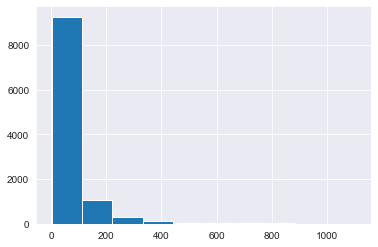

In [101]:
# Your code here - Check for outliers
df.list_price.hist()


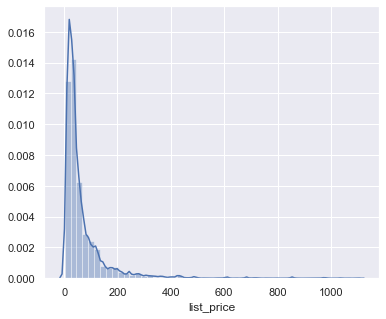

In [117]:
import seaborn as sns
sns.distplot(df.list_price)

In [ ]:
# Your code here
# Remove extreme outliers


# Rerun the model

In [118]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.list_price.quantile(q=q)))

0.8 percentile: 90.986
0.81 percentile: 92.66216100000052
0.82 percentile: 97.5878
0.83 percentile: 101.898
0.84 percentile: 109.13971199999885
0.85 percentile: 110.352
0.86 percentile: 119.96492
0.87 percentile: 121.9878
0.88 percentile: 121.9878
0.89 percentile: 134.18779999999998
0.9 percentile: 143.952
0.91 percentile: 153.986
0.92 percentile: 170.7878
0.93 percentile: 182.9878
0.94 percentile: 198.7929
0.95 percentile: 220.03032999999942
0.96 percentile: 251.90543999999994
0.97 percentile: 292.7878
0.98 percentile: 359.88
0.99 percentile: 463.5878


In [119]:
orig_tot = len(df)
df = df[df.list_price < 450] # Subsetting to remove extreme outliers
print('Percent removed:', (orig_tot -len(df))/orig_tot)
df.list_price = df.list_price.map(np.log) # Applying a log transformation
train, test = train_test_split(df)

# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

Percent removed: 0.010487580496780129


C:\Users\halpe\.conda\envs\learn-env\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     430.4
Date:                Thu, 08 Oct 2020   Prob (F-statistic):               0.00
Time:                        14:41:19   Log-Likelihood:                -4882.4
No. Observations:                8067   AIC:                             9883.
Df Residuals:                    8008   BIC:                         1.030e+04
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            3.4189      0.014    247.310      0.000       3.392       3.446
piece_count                                          0.5875      0.010     58.995      0.000       0.568       0.607
num_reviews                                         -0.0197      0.008     -2.530      0.011      -0.035      -0.004
play_star_rating                                     0.1301      0.007     19.345      0.000       0.117       0.143
star_rating                                         -0.0636      0.008     -7.491      0.000      -0.080      -0.047
val_star_rating                                     -0.1231      0.008    -16.324      0.000      -0.138      -0.108
ages_10_14                                           0.4416      0.123      3.580      0.000       0.200       0.683
ages_10_16                                           0.6407      0.045     14.306      0.000       0.553       0.729
ages_11_16                                           0.3585      0.069      5.161      0.000       0.222       0.495
ages_12_16                                           0.1342      0.083      1.617      0.106      -0.029       0.297
ages_14plus                                          0.5183      0.052     10.017      0.000       0.417       0.620
ages_2_5                                             0.4742      0.022     21.213      0.000       0.430       0.518
ages_5_12                                           -0.7891      0.032    -24.811      0.000      -0.851      -0.727
ages_6plus                                          -0.9713      0.070    -13.923      0.000      -1.108      -0.835
ages_6_12                                           -0.1636      0.020     -8.198      0.000      -0.203      -0.124
ages_7_12                                            0.1129      0.025      4.549      0.000       0.064       0.161
ages_7_14                                            0.0095      0.021      0.454      0.650      -0.032       0.051
ages_8plus                                           0.5574      0.054     10.332      0.000       0.452       0.663
ages_8_12                                            0.2789      0.031      8.918      0.000       0.218       0.340
ages_8_14                                            0.3950      0.022     17.719      0.000       0.351       0.439
ages_9plus                                           0.0920      0.121      0.761      0.447      -0.145       0.329
ages_9_12                                            0.4035      0.079      5.113      0.000       0.249       0.558
ages_9_14                                            0.5888      0.032     18.273      0.000       0.526       0.652
theme_name_BOOST                         

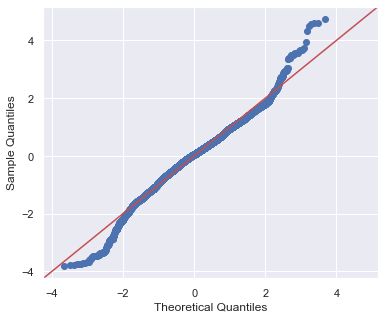

In [120]:
# Your code here - Check normality assumption
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

# Note how it's better

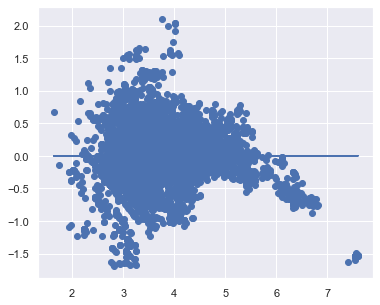

In [121]:
# Your code here - Check the Homoscedasticity Assumption
# Comment: There is still a clear underestimate now by the model as the log transformed 
# list price increases, but the model is much improved. Further subsetting is potentially warranted.
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

0.8 percentile: 4.447203233446613
0.81 percentile: 4.512971560274537
0.82 percentile: 4.542526402035123
0.83 percentile: 4.580752485605895
0.84 percentile: 4.640913706863106
0.85 percentile: 4.6985494117910225
0.86 percentile: 4.718373863481943
0.87 percentile: 4.787408405976297
0.88 percentile: 4.8039210397329235
0.89 percentile: 4.826327766567244
0.9 percentile: 4.89924031131419
0.91 percentile: 4.976713742220571
0.92 percentile: 5.0490223265009595
0.93 percentile: 5.140421850231899
0.94 percentile: 5.209419483952433
0.95 percentile: 5.292263579298989
0.96 percentile: 5.391752152536553
0.97 percentile: 5.528952783620542
0.98 percentile: 5.678340376637527
0.99 percentile: 5.873347331375852


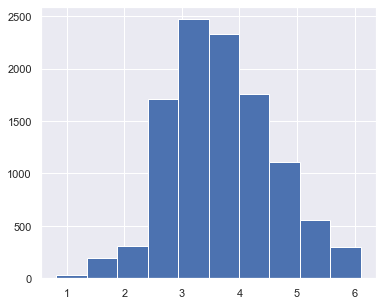

In [122]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.list_price.quantile(q=q)))

df.list_price.hist()

In [123]:
df = df[df.list_price <= 6]
train, test = train_test_split(df)

# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     422.2
Date:                Thu, 08 Oct 2020   Prob (F-statistic):               0.00
Time:                        14:43:03   Log-Likelihood:                -4831.4
No. Observations:                8027   AIC:                             9781.
Df Residuals:                    7968   BIC:                         1.019e+04
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            3.4271      0.014    241.889      0.000       3.399       3.455
piece_count                                          0.6217      0.011     56.569      0.000       0.600       0.643
num_reviews                                         -0.0143      0.008     -1.812      0.070      -0.030       0.001
play_star_rating                                     0.1249      0.007     18.803      0.000       0.112       0.138
star_rating                                         -0.0567      0.008     -6.708      0.000      -0.073      -0.040
val_star_rating                                     -0.1252      0.008    -16.357      0.000      -0.140      -0.110
ages_10_14                                           0.4288      0.119      3.598      0.000       0.195       0.662
ages_10_16                                           0.6219      0.046     13.531      0.000       0.532       0.712
ages_11_16                                           0.2775      0.065      4.250      0.000       0.150       0.406
ages_12_16                                          -0.1021      0.085     -1.198      0.231      -0.269       0.065
ages_14plus                                          0.4475      0.053      8.459      0.000       0.344       0.551
ages_2_5                                             0.4590      0.022     20.809      0.000       0.416       0.502
ages_5_12                                           -0.7417      0.032    -23.175      0.000      -0.804      -0.679
ages_6plus                                          -0.9446      0.066    -14.231      0.000      -1.075      -0.814
ages_6_12                                           -0.1458      0.020     -7.208      0.000      -0.185      -0.106
ages_7_12                                            0.1242      0.025      4.975      0.000       0.075       0.173
ages_7_14                                            0.0261      0.021      1.235      0.217      -0.015       0.067
ages_8plus                                           0.5609      0.054     10.358      0.000       0.455       0.667
ages_8_12                                            0.2882      0.032      9.026      0.000       0.226       0.351
ages_8_14                                            0.3836      0.022     17.169      0.000       0.340       0.427
ages_9plus                                           0.1333      0.124      1.072      0.284      -0.111       0.377
ages_9_12                                            0.3976      0.084      4.734      0.000       0.233       0.562
ages_9_14                                            0.5519      0.032     17.053      0.000       0.488       0.615
theme_name_BOOST                         

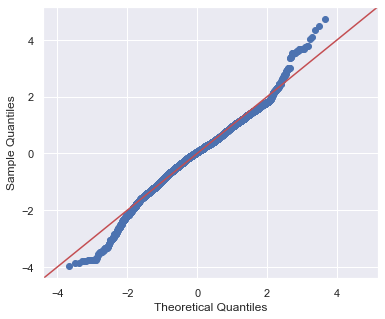

In [124]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

## Summary

Well done! As you can see, regression can be a challenging task that requires you to make decisions along the way, try alternative approaches, and make ongoing refinements. These choices depend on the context and specific use cases. 